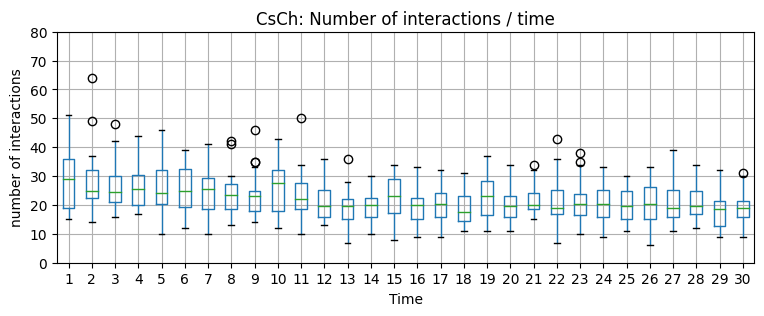

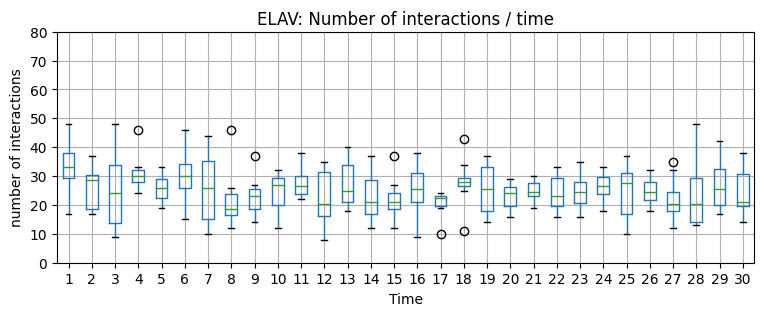

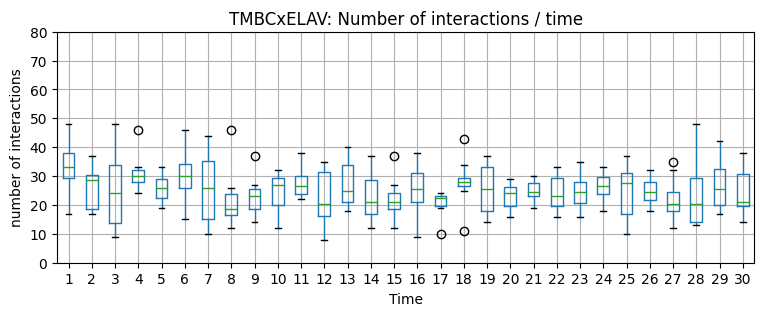

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from src.utils import fileio
import matplotlib.pyplot as plt

path = "/home/milky/drosophila-SNA/data/processed/1_0_find_interactions"
df_edges = pd.DataFrame()

all_treatments = fileio.load_multiple_folders(path)

for treatment_name, treatment_path in all_treatments.items():
    treatments = fileio.load_files_from_folder(treatment_path)
    for name, path in treatments.items():
        df = pd.read_csv(path, index_col=0)
        df = df.sort_values('start_of_interaction')
        # df['node_combination'] = df.apply(lambda row: '_'.join(sorted([row['node_1'], row['node_2']])), axis=1)
        # df = df.drop_duplicates(subset=['node_combination'])
        df["snapshot"] = df['start_of_interaction'] // (1440) #
        df["snapshot"]  = df["snapshot"]+1
        unique_count = df['snapshot'].value_counts()
        unique_count = unique_count.sort_index(ascending=True)
        df_edges[name] = unique_count


df_csch = df_edges.filter(like='CsCh')
df_elav = df_edges.filter(like='ELAV')
df_elav = df_edges.filter(like='TMBCxELAV')

fig, axes = plt.subplots(figsize=(9, 3))
df_csch.T.boxplot()
plt.ylim(0, 80)
plt.title("CsCh: Number of interactions / time")
plt.xlabel("Time")
plt.ylabel("number of interactions")
plt.show()

fig, axes = plt.subplots(figsize=(9, 3))
df_elav.T.boxplot()
plt.ylim(0, 80)
plt.title("ELAV: Number of interactions / time")
plt.xlabel("Time")
plt.ylabel("number of interactions")
plt.show()

fig, axes = plt.subplots(figsize=(9, 3))
df_elav.T.boxplot()
plt.ylim(0, 80)
plt.title("TMBCxELAV: Number of interactions / time")
plt.xlabel("Time")
plt.ylabel("number of interactions")
plt.show()

In [5]:
treatment_path


'/home/milky/drosophila-SNA/data/processed/1_0_find_interactions/TMBCxELAV'

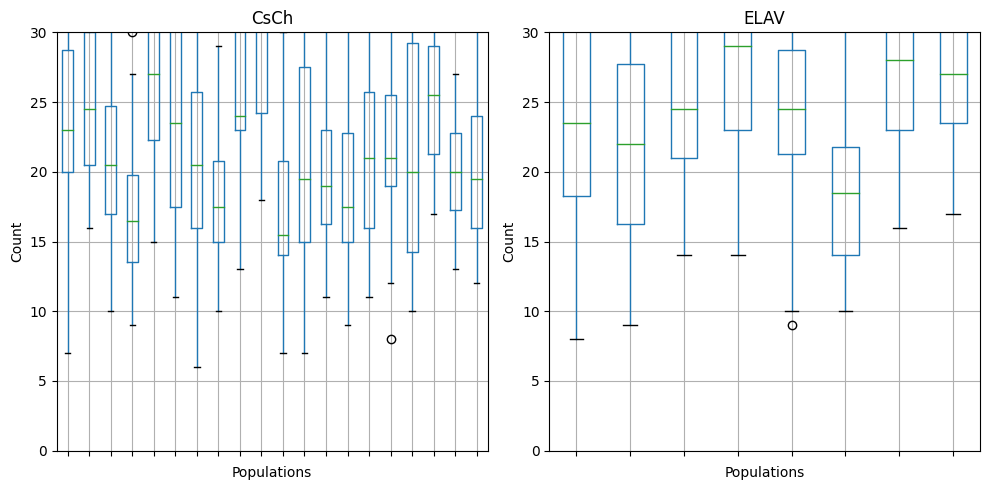

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df_csch.boxplot(ax=axes[0])
axes[0].set_title("CsCh")
axes[0].set_xticklabels([])
# axes[0].set_xticklabels(df_csch.columns, rotation=90)
axes[0].set_xlabel("Populations")
axes[0].set_ylabel("Count")
axes[0].set_ylim(0, 30)

df_elav.boxplot(ax=axes[1])
axes[1].set_title("ELAV")
axes[1].set_xticklabels([])
# axes[1].set_xticklabels(df_elav.columns, rotation=90)
axes[1].set_xlabel("Populations")
axes[1].set_ylabel("Count")
axes[1].set_ylim(0, 30)  


plt.tight_layout()
plt.show()


**Koliko vremena treba od 0 do potpuno povezane mreze?**

In [29]:

for name, path in treatments.items():
    df = pd.read_csv(path, index_col=0)
    df = df.sort_values('start_of_interaction')
    df = df.sort_values('start_of_interaction')
    df.drop_duplicates(subset=['node_1', 'node_2'], keep='first', inplace=True)
    last_interaction = max(df["start_of_interaction"])
    print(last_interaction/24/60)

29.669444444444444
28.891666666666666
26.580555555555556
28.55
29.744444444444447
20.83888888888889
28.3125
29.78402777777778
25.997916666666665
26.05277777777778


In [17]:
df

,node_1,node_2,start_of_interaction,end_of_interaction,duration,snapshot
235,fly5,fly9,147,156,10,1
221,fly7,fly5,357,365,9,1
229,fly7,fly10,488,501,14,1
136,fly1,fly9,610,618,9,1
96,fly11,fly7,625,633,9,1
...,...,...,...,...,...,...
9,fly9,fly7,42482,42490,9,30
267,fly8,fly2,42605,42613,9,30
2,fly9,fly3,42822,42832,11,30
80,fly2,fly7,43079,43094,16,30


**Broj interakcija po snapshotu**

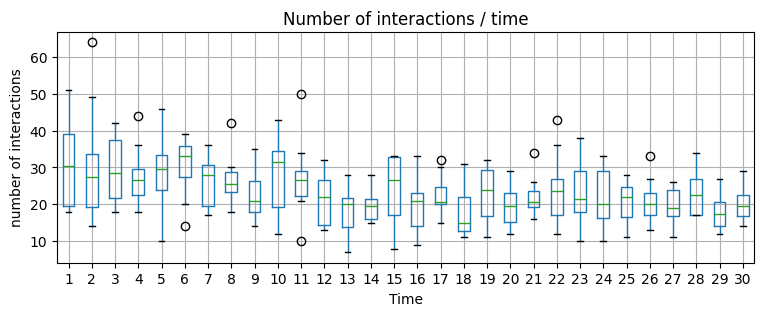

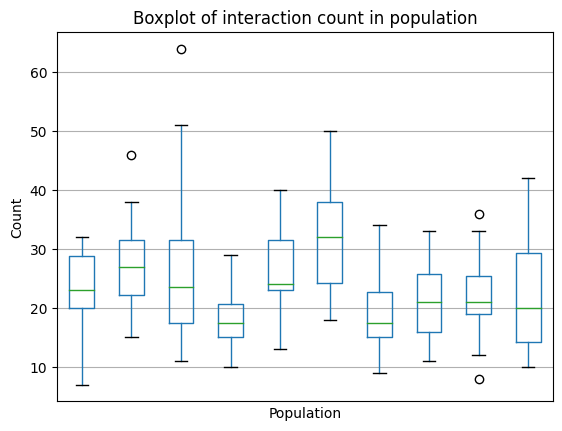

In [20]:
snapshot_graphs = []
for i in range(1, 11):
    filtered_df = df[df['snapshot'] == i]
    G = nx.DiGraph()

    nodes = ['fly' + str(i) for i in range(1, 13)]
    G.add_nodes_from(nodes) 

    for _, row in filtered_df.iterrows():
        node_1 = row['node_1']
        node_2 = row['node_2']
        duration = row['duration']
        count=1

        if G.has_edge(node_1, node_2):
            count += G[node_1][node_2]['count']
            duration += duration

        else:
            G.add_edge(node_1, node_2, count=count, duration=duration)
    
    snapshot_graphs.append(G)

In [ ]:
plot_graphs = snapshot_graphs #[:8]

num_rows = 6
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
axes = axes.flatten()

g_density = []
degrees_list = []
# Iterate over the graphs and plot them
for i, graph in enumerate(plot_graphs):
    # Generate circular layout positions for the nodes
    layout_positions = nx.circular_layout(graph)

    out_degrees = dict(graph.out_degree())
    degrees_list.append(out_degrees)

    node_sizes = [250 * (out_degrees[node] + 1) for node in graph.nodes()]

    # Plot the graph using the circular layout positions
    ax = axes[i]
    ax.set_title(f'Graph {i+1}')
    nx.draw(graph, pos=layout_positions, with_labels=True, node_color='lightblue', node_size=node_sizes, edge_color='gray', arrowsize=10, ax=ax)

    # Calculate the density of the graph
    graph_density = nx.density(graph)
    g_density.append(graph_density)
    # Add density value as a text annotation under the graph
    ax.text(0.5, -0.1, f'Density: {graph_density:.3f}', transform=ax.transAxes, ha='center')

# Hide the remaining empty subplots
for j in range(len(plot_graphs), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [100]:
g_density_1 = g_density

In [32]:

in_values = []
out_values = []

for graph in snapshot_graphs:
    in_degree = graph.in_degree()
    out_degree = graph.out_degree()

    print(in_degree.values())
    in_values.append(in_degree)
    out_values.append(out_degree)


AttributeError: 'InDegreeView' object has no attribute 'values'

In [29]:
d_in = {}
for i, in_v in enumerate(in_values):
    in_degrees = list(in_v.values())

    d_in.update({i: in_degrees})

d_out = {}
for i, out_v in enumerate(out_values):
    out_degrees = list(out_v.values())

    d_out.update({i: out_degrees})

AttributeError: 'InDegreeView' object has no attribute 'values'

Text(0.5, 1.0, 'Out degree centrality')

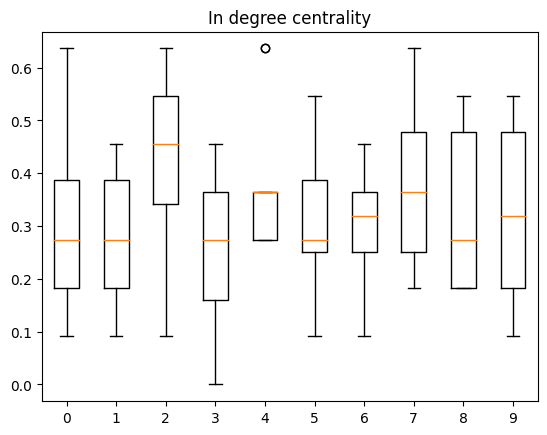

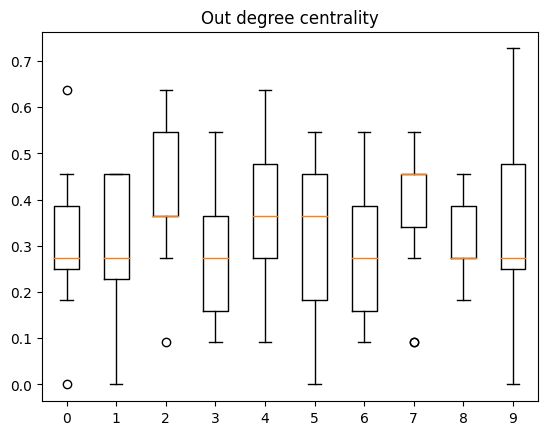

In [27]:
fig, ax = plt.subplots()
ax.boxplot(d_in.values())
ax.set_xticklabels(d_in.keys())
ax.set_title("In degree centrality")

fig, ax = plt.subplots()
ax.boxplot(d_out.values())
ax.set_xticklabels(d_out.keys())
ax.set_title("Out degree centrality")